## Logistic Regression Challenge

In [28]:
#import the required packages here
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Task 1: Download the data and load them into Python.
You can find the data [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bX0MzUEhVdmpCc3c/view?usp=sharing&resourcekey=0-BirYbvtYO-hSEt09wpEBRw).

**Note**
- Features and response variables are in different files.
- Be careful about number of spaces between the values in the file.

In [2]:
# get headers
headers = pd.read_csv("data/Smartphone_Sensor_Data/features.txt", header=None, engine='python', sep=r'[ ]{1,}')
columns = list(headers[1])

In [3]:
# get feature data
features = pd.read_csv("data/Smartphone_Sensor_Data/train/X_train.txt", header=None, engine='python', sep=r'[ ]{1,}')

# assign column names

features.columns = columns

In [4]:
# find column names that include mean values
columns = np.array(columns)
columns_mean = columns[np.where(np.char.find(columns, 'mean()') >= 0)]
columns_meanx = columns[np.where(np.char.find(columns, 'mean()-X') >= 0)]

In [5]:
# filter for only mean values
features

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [6]:
target = pd.read_csv("data/Smartphone_Sensor_Data/train/y_train.txt", header=None)
target = target[0]
target

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: 0, Length: 7352, dtype: int64

### Task 2: Create a binary target variable: categories 1,2,3 --> 1, categories 4,5,6 --> 0 
This will represent a binary variable indicating if person is walking or not.

In [43]:
binarytarget = target
binarytarget = binarytarget.replace(to_replace={2:1,3:1,4:0,5:0,6:0})

### Task 3

+ Create a Univariate Binary Logistic Regression with feature number 54, which represents `tGravityAcc-min()-Y`: gravity acceleration signals in direction of Y.
+ Compare the results of the Logistic regressions from different Python packages (sklearn, statsmodel).
+ Plot the **fit** of predicted probabilities to the original values.

In [8]:
# get the independant variable
feature = features['tGravityAcc-min()-Y']
feature

0      -0.123213
1      -0.114893
2      -0.114893
3      -0.121336
4      -0.121834
          ...   
7347   -0.234998
7348   -0.234998
7349   -0.216004
7350   -0.210542
7351   -0.212149
Name: tGravityAcc-min()-Y, Length: 7352, dtype: float64

In [9]:
# reshape array
feature = np.array(feature).reshape(-1,1)

# fit model
binarymodel = LogisticRegression().fit(feature, binarytarget)

In [10]:
# make a prediction
binary_pred = binarymodel.predict(feature)
np.unique(binary_pred, return_counts=True)

(array([0, 1]), array([3449, 3903]))

In [11]:
# plot the confusion matrix
cnf_matrix = metrics.confusion_matrix(binarytarget, binary_pred)
cnf_matrix

array([[2889, 1178],
       [ 560, 2725]])

In [12]:
# build the model

log_reg = sm.Logit(binarytarget, feature).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.494212
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7352
Model:                          Logit   Df Residuals:                     7351
Method:                           MLE   Df Model:                            0
Date:                Tue, 28 Jun 2022   Pseudo R-squ.:                  0.2811
Time:                        21:18:19   Log-Likelihood:                -3633.4
converged:                       True   LL-Null:                       -5054.4
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -5.1002      0.129    -39.642      0.000      -5.352      -4.848


### Task 4
- Try to fit a Binary Logistic Regression with all the features? How many are significant?

In [13]:
binarytarget

0       0
1       0
2       0
3       0
4       0
       ..
7347    1
7348    1
7349    1
7350    1
7351    1
Name: 0, Length: 7352, dtype: int64

In [15]:
features_mean = features[columns_mean]
features_meanx = features[columns_meanx]
features_meanx

,tBodyAcc-mean()-X,tGravityAcc-mean()-X,tBodyAccJerk-mean()-X,tBodyGyro-mean()-X,tBodyGyroJerk-mean()-X,fBodyAcc-mean()-X,fBodyAccJerk-mean()-X,fBodyGyro-mean()-X
0,0.288585,0.963396,0.077996,-0.006101,-0.099167,-0.994783,-0.992332,-0.986574
1,0.278419,0.966561,0.074007,-0.016112,-0.110503,-0.997451,-0.995032,-0.977387
2,0.279653,0.966878,0.073636,-0.031698,-0.108486,-0.993594,-0.990994,-0.975433
3,0.279174,0.967615,0.077321,-0.043410,-0.091170,-0.995491,-0.994447,-0.987110
4,0.276629,0.968224,0.073444,-0.033960,-0.090770,-0.997286,-0.996292,-0.982446
...,...,...,...,...,...,...,...,...
7347,0.299665,0.923148,-0.319227,-0.035024,0.040906,-0.131366,-0.277608,-0.334216
7348,0.273853,0.918343,-0.422605,0.118696,-0.144067,-0.159077,-0.352629,-0.429959
7349,0.273387,0.919810,0.096541,-0.213192,-0.231529,-0.345767,-0.395901,-0.434122
7350,0.289654,0.922323,-0.025849,-0.406205,-0.079919,-0.400368,-0.470140,-0.562069


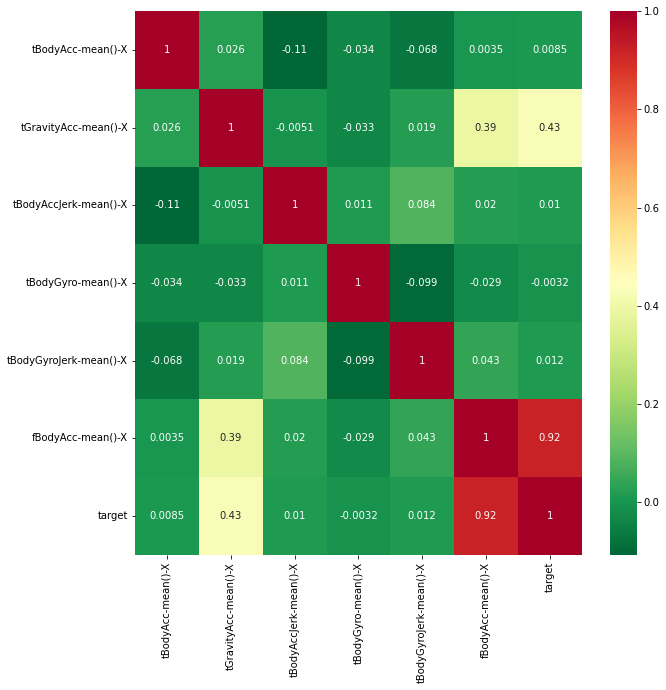

In [23]:
# most correlated features with income
temp = features_meanx
temp['target'] = binarytarget
corrmat = temp.corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(temp.corr(),annot=True,cmap="RdYlGn_r")

## next time check a scatterplot

In [48]:
features_meanx.columns

Index(['tBodyAcc-mean()-X', 'tGravityAcc-mean()-X', 'tBodyAccJerk-mean()-X',
       'tBodyGyro-mean()-X', 'tBodyGyroJerk-mean()-X', 'fBodyAcc-mean()-X',
       'target'],
      dtype='object')

In [54]:
temp = features_meanx[['tBodyAcc-mean()-X','tGravityAcc-mean()-X']]

In [33]:
for column in features_meanx.drop('target', axis=1).columns:
    fig = px.histogram(features_meanx, x=column)
    fig.show()


In [19]:
features_meanx.columns

Index(['tBodyAcc-mean()-X', 'tGravityAcc-mean()-X', 'tBodyAccJerk-mean()-X',
       'tBodyGyro-mean()-X', 'tBodyGyroJerk-mean()-X', 'fBodyAcc-mean()-X',
       'fBodyAccJerk-mean()-X', 'fBodyGyro-mean()-X', 'target'],
      dtype='object')

In [21]:
features_meanx = features_meanx.drop(['fBodyAccJerk-mean()-X', 'fBodyGyro-mean()-X'], axis=1)

In [22]:
features_meanx

,tBodyAcc-mean()-X,tGravityAcc-mean()-X,tBodyAccJerk-mean()-X,tBodyGyro-mean()-X,tBodyGyroJerk-mean()-X,fBodyAcc-mean()-X,target
0,0.288585,0.963396,0.077996,-0.006101,-0.099167,-0.994783,0
1,0.278419,0.966561,0.074007,-0.016112,-0.110503,-0.997451,0
2,0.279653,0.966878,0.073636,-0.031698,-0.108486,-0.993594,0
3,0.279174,0.967615,0.077321,-0.043410,-0.091170,-0.995491,0
4,0.276629,0.968224,0.073444,-0.033960,-0.090770,-0.997286,0
...,...,...,...,...,...,...,...
7347,0.299665,0.923148,-0.319227,-0.035024,0.040906,-0.131366,1
7348,0.273853,0.918343,-0.422605,0.118696,-0.144067,-0.159077,1
7349,0.273387,0.919810,0.096541,-0.213192,-0.231529,-0.345767,1
7350,0.289654,0.922323,-0.025849,-0.406205,-0.079919,-0.400368,1


In [55]:
# build the model
binarytarget = pd.DataFrame(binarytarget)
log_reg = sm.Logit(binarytarget, temp).fit(maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.591522
         Iterations 6


In [45]:
# fit model

binarymodel = LogisticRegression().fit(features, binarytarget)
ypred = binarymodel.predict(features)

In [47]:
pd.DataFrame(binarymodel.coef_)

array([[ 1.59805156e-01,  3.44689072e-02, -1.17726976e-02,
         2.97910000e-01,  1.52138739e-01,  9.76977757e-02,
         2.77623934e-01,  1.50825309e-01,  8.77097433e-02,
         5.06386347e-01,  9.80238152e-02,  3.83597860e-02,
        -4.70687289e-02, -8.00926615e-02, -5.38746887e-02,
         1.81757055e-01,  6.12043104e-02, -4.21274496e-02,
        -8.20373717e-02,  2.28568843e-01,  1.10582779e-01,
         9.05915769e-02,  2.85942734e-01,  2.08663591e-01,
         7.40879874e-03, -1.72476331e-01,  1.16757553e-02,
        -6.97936896e-03,  9.50225428e-02, -8.11459845e-02,
         7.14973309e-02, -4.48034640e-02,  8.14821506e-02,
        -1.87510602e-01,  1.68437643e-01, -8.29265408e-02,
        -1.06114154e-02, -2.22772489e-01,  8.05478429e-02,
        -1.75644750e-01,  3.14057895e-01, -2.89365358e-01,
        -9.05940009e-02, -2.19036391e-01, -1.58146864e-01,
        -2.18371515e-01, -2.14467825e-01, -1.51620357e-01,
        -2.15746345e-01,  2.29429579e-01, -3.14686744e-0

### Task 5
Now, let's fit Multinomial Logistic regression to predict all categories. Firstly, we can start with **Univariate** model for these features number separately:
+ 4
+ 54
- 19

Check the contingency matrix to see the effect of particular features!! (each feature can be good in predicting different categories)

### Task 6

Fit the Multinomial Logistic Regression model again. Now, try to choose **all** the important features we have in the dataset. Compare with your peers on who will get the best predictions with the smallest number of features?

### Task 7 (Stretch)
Create your own function for Stepwise selection. Use either sklearn or statsmodel.